In [30]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [31]:
# Define functions
def average_metric_data(metric):
    # Get all key-index combinations
    all_key_indices = set()
    for sim in metric:
        for d in sim:
            for k, v in d.items():
                for i in range(len(v)):
                    all_key_indices.add((k, i))
    
    sorted_keys = sorted(all_key_indices)  # sort by key then index

    data = []
    for t in range(len(metric[0])):  # number of timesteps
        averaged_dict = {}
        for k, idx in sorted_keys:
            values = [sim[t].get(k, [0.0] * (idx + 1))[idx] for sim in metric]
            averaged_dict[(k, idx)] = np.mean(values)
        sorted_values = [averaged_dict[(k, idx)] for k, idx in sorted_keys]
        data.append(sorted_values)

    # Compute label positions per key
    key_indices = defaultdict(list)
    for idx, (k, _) in enumerate(sorted_keys):
        key_indices[k].append(idx)

    label_positions = {k: max(idxs) for k, idxs in key_indices.items()}
    labels = [f"{k}" for k in label_positions.keys()]  # optional: add count

    return np.array(data), labels, label_positions

def compute_averages(metric):
    sim1, sim2 = metric
    avg_sim1 = [np.mean([v for lst in d.values() for v in lst]) for d in sim1]
    avg_sim2 = [np.mean([v for lst in d.values() for v in lst]) for d in sim2]
    avg_combined = [(a + b) / 2 for a, b in zip(avg_sim1, avg_sim2)]
    return avg_sim1, avg_sim2, avg_combined

In [32]:
# Example metrics list (add as many as you want)
metrics = [
    (
        [
            {1: [0.0, 0.0, 0.0], 2: [0.199, 0.185, 0.192], 3: [2.027]},
            {1: [0.123, 0.34, 0.721], 2: [0.256, 0.467, 0.378], 3: [1.265]}
        ],
        [
            {1: [0.853, 0.074, 0.279], 2: [0.689, 0.983, 0.867], 3: [4.311]},
            {1: [0.632, 0.002, 0.023], 2: [0.327, 0.589, 0.256], 3: [1.542]}
        ]
    ),
    (
        [
            {1: [0.15, 0.25, 0.35], 2: [0.45, 0.55, 0.65], 3: [1.75]},
            {1: [0.22, 0.31, 0.41], 2: [0.52, 0.62, 0.72], 3: [1.89]}
        ],
        [
            {1: [0.91, 0.11, 0.21], 2: [0.61, 0.81, 0.71], 3: [3.55]},
            {1: [0.44, 0.14, 0.24], 2: [0.34, 0.54, 0.64], 3: [1.99]}
        ]
    ),
    (
        [
            {1: [0.0, 0.0, 0.0], 2: [0.199, 0.185, 0.192], 3: [2.027]},
            {1: [0.123, 0.34, 0.721], 2: [0.256, 0.467, 0.378], 3: [1.265]}
        ],
        [
            {1: [0.853, 0.074, 0.279], 2: [0.689, 0.983, 0.867], 3: [4.311]},
            {1: [0.632, 0.002, 0.023], 2: [0.327, 0.589, 0.256], 3: [1.542]}
        ]
    ),
    (
        [
            {1: [0.15, 0.25, 0.35], 2: [0.45, 0.55, 0.65], 3: [1.75]},
            {1: [0.22, 0.31, 0.41], 2: [0.52, 0.62, 0.72], 3: [1.89]}
        ],
        [
            {1: [0.91, 0.11, 0.21], 2: [0.61, 0.81, 0.71], 3: [3.55]},
            {1: [0.44, 0.14, 0.24], 2: [0.34, 0.54, 0.64], 3: [1.99]}
        ]
    )
]

In [44]:
from hoi.metrics import InfoTopo, TC, DTC, Sinfo, Oinfo, RedundancyphiID, SynergyphiID
metrics_types = [InfoTopo, TC, DTC, Sinfo, Oinfo, RedundancyphiID, SynergyphiID]

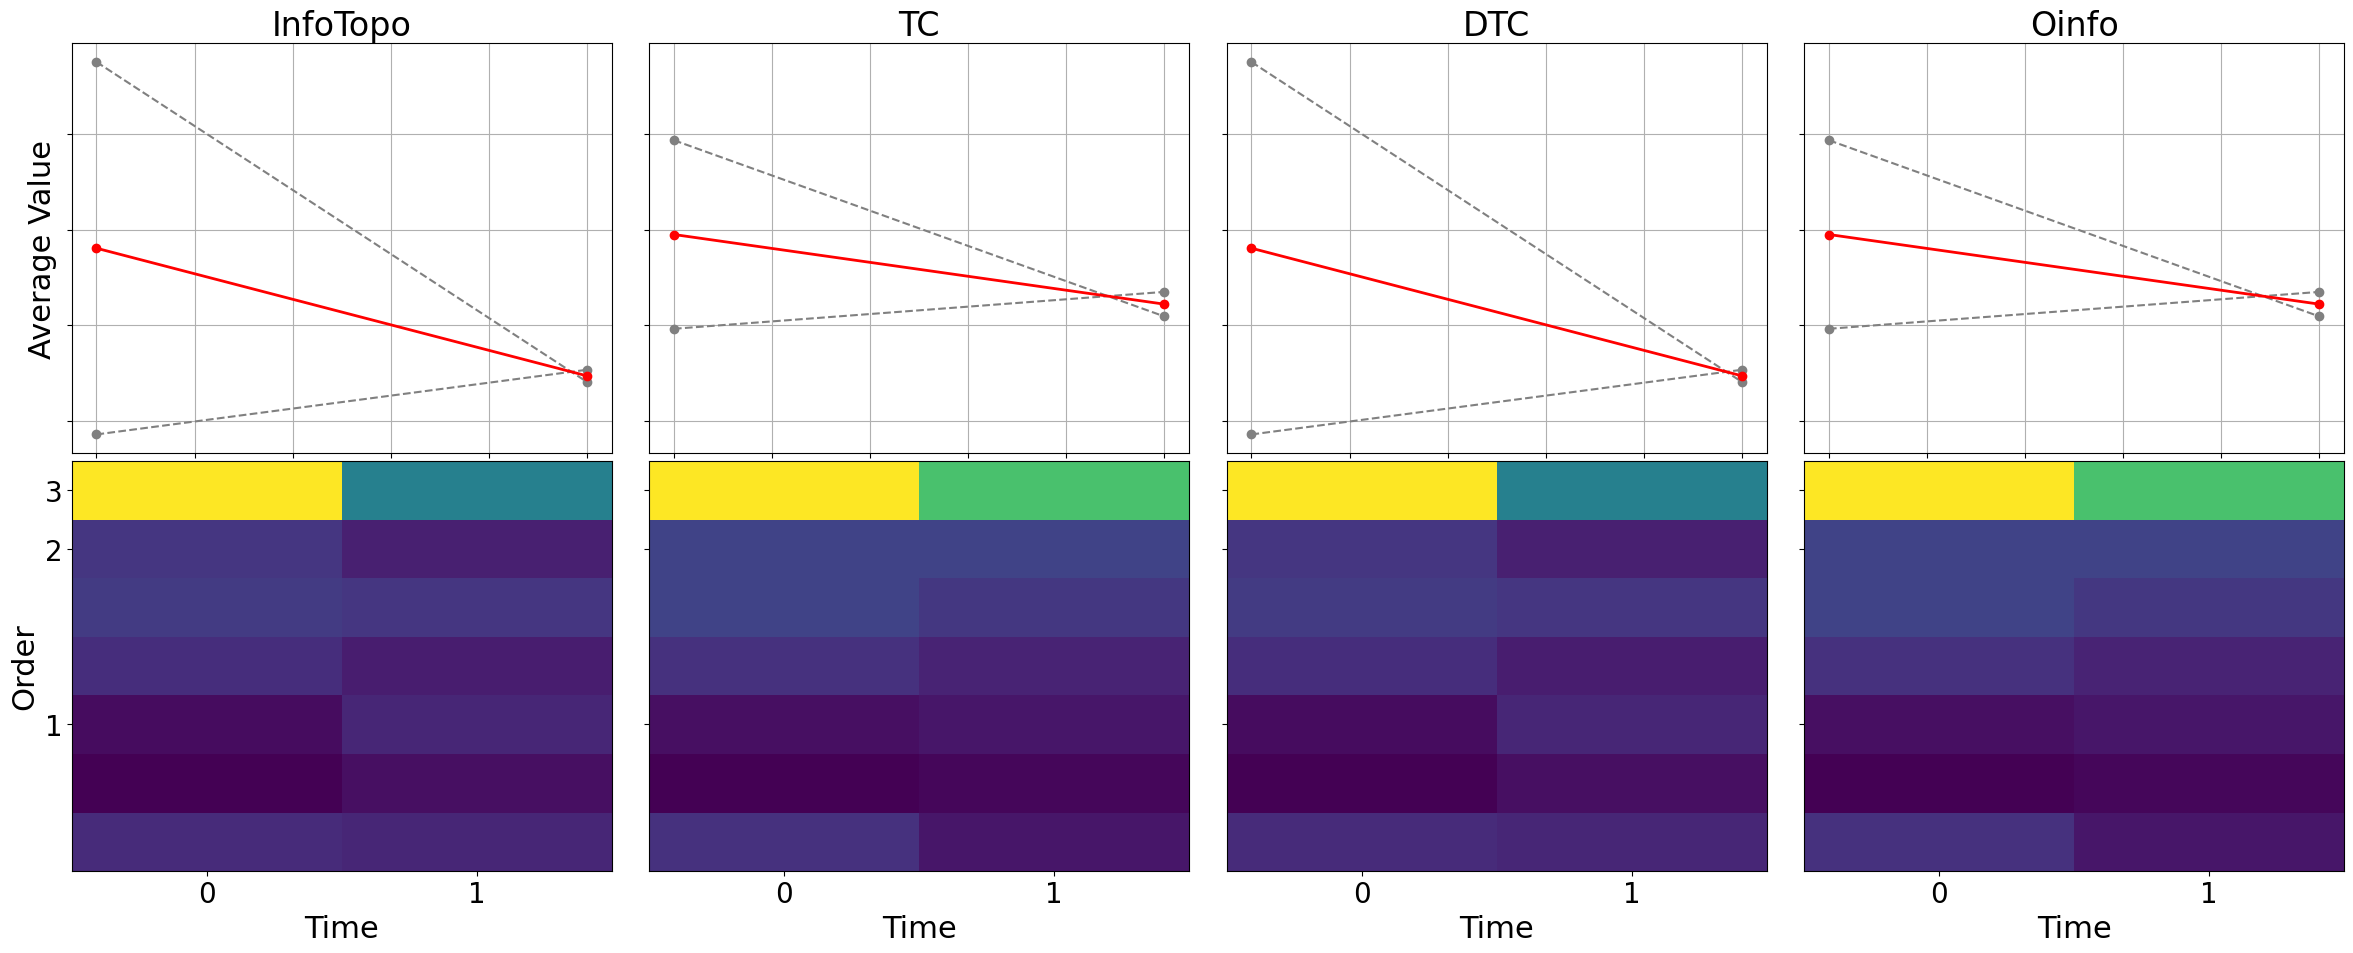

In [42]:
# Prepare data for all metrics
prepared_data = [average_metric_data(m) for m in metrics]
averages = [compute_averages(m) for m in metrics]

timesteps = list(range(1, len(metrics[0][0]) + 1))  # assumes same length for all metrics

# Adjust all font sizes globally
fontsize_standard = 20
plt.rcParams.update({
    'font.size': fontsize_standard+2,
    'axes.titlesize': fontsize_standard+4,
    'axes.labelsize': fontsize_standard+2,
    'xtick.labelsize': fontsize_standard,
    'ytick.labelsize': fontsize_standard,
    'legend.fontsize': fontsize_standard
})

# Setup figure with 2 rows and len(metrics) columns
fig, axs = plt.subplots(2, len(metrics), figsize=(6 * len(metrics), 10), sharey='row')

# If only one metric, axs will be 1D, fix to 2D for consistent indexing
if len(metrics) == 1:
    axs = np.array(axs).reshape(2,1)

# Top row: line plots
for i, (ax, (avg_sim1, avg_sim2, avg_combined), title) in enumerate(zip(
    axs[0],
    averages,
    [f"{metrics_types[i].__name__}" for i in range(len(metrics))]
)):
    ax.plot(timesteps, avg_sim1, color='grey', linestyle='--', marker='o', label='Simulation 1')
    ax.plot(timesteps, avg_sim2, color='grey', linestyle='--', marker='o', label='Simulation 2')
    ax.plot(timesteps, avg_combined, color='red', marker='o', linewidth=2, label='Average')
    ax.set_title(title)
    ax.set_xticklabels([])

    if i == 0:
        ax.set_ylabel("Average Value")
    else:
        ax.set_yticklabels([])

    ax.grid(True)

# Bottom row: heatmaps
for i, (ax, (data, labels, label_positions), title) in enumerate(zip(
    axs[1],
    prepared_data,
    [f"Heatmap: Metric {i+1}" for i in range(len(metrics))]
)):
    cax = ax.imshow(data.T, aspect='auto', cmap='viridis', origin='lower')
    ax.set_xlabel("Time")
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_xticklabels(np.arange(data.shape[0]))

    if i == 0:
        ax.set_ylabel("Order")
        yticks = list(label_positions.values())
        ylabels = labels
        ax.set_yticks(yticks)
        ax.set_yticklabels(ylabels)

plt.tight_layout(h_pad=0.1)
plt.show()